# Training BTC Price Prediction Model
### Import Libraries and Settings

In [97]:
import numpy as np
import random
import pandas as pd 
from pylab import mpl, plt
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

from datetime import datetime
import math, time
import itertools
import datetime
from operator import itemgetter
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from math import sqrt
import torch
import torch.nn as nn
from torch.autograd import Variable

### Load Data

In [98]:

df_btc=pd.read_csv("../data/input/btcusd.csv")
df_eth=pd.read_csv("../data/input/ethusd.csv")

In [99]:
df_btc.head()

,time,open,close,high,low,volume
0,1364774820000,93.25,93.30,93.30,93.25,93.300000
1,1364774880000,100.00,100.00,100.00,100.00,93.300000
2,1364774940000,93.30,93.30,93.30,93.30,33.676862
3,1364775060000,93.35,93.47,93.47,93.35,20.000000
4,1364775120000,93.47,93.47,93.47,93.47,2.021627


In [100]:
df_btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3841878 entries, 0 to 3841877
Data columns (total 6 columns):
 #   Column  Dtype  
---  ------  -----  
 0   time    int64  
 1   open    float64
 2   close   float64
 3   high    float64
 4   low     float64
 5   volume  float64
dtypes: float64(5), int64(1)
memory usage: 175.9 MB


In [101]:
df_eth.head()

,time,open,close,high,low,volume
0,1457539440000,10.297,10.097,10.297,10.097,0.03
1,1457545740000,11.197,11.197,11.197,11.197,0.01
2,1457549760000,11.097,11.097,11.097,11.097,0.02
3,1457554560000,11.195,11.195,11.195,11.195,0.01
4,1457554860000,10.870,10.870,10.870,10.870,1.00


In [102]:
df_eth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2624590 entries, 0 to 2624589
Data columns (total 6 columns):
 #   Column  Dtype  
---  ------  -----  
 0   time    int64  
 1   open    float64
 2   close   float64
 3   high    float64
 4   low     float64
 5   volume  float64
dtypes: float64(5), int64(1)
memory usage: 120.1 MB


In [103]:
df_btc['time'] = df_btc['time'].apply(lambda d: datetime.datetime.fromtimestamp(int(d)/1000).strftime('%Y-%m-%d %H:%M:%S'))
df_btc = df_btc.set_index('time')
df_btc.index.name = None
df_btc = df_btc.drop(df_btc.columns[[0, 2, 3, 4]], axis=1)
df_btc.head()

,close
2013-03-31 20:07:00,93.30
2013-03-31 20:08:00,100.00
2013-03-31 20:09:00,93.30
2013-03-31 20:11:00,93.47
2013-03-31 20:12:00,93.47


In [104]:
df_eth['time'] = df_eth['time'].apply(lambda d: datetime.datetime.fromtimestamp(int(d)/1000).strftime('%Y-%m-%d %H:%M:%S'))
df_eth = df_eth.set_index('time')
df_eth.index.name = None
df_eth = df_eth.drop(df_eth.columns[[0, 2, 3, 4]], axis=1)
df_eth.head()

,close
2016-03-09 11:04:00,10.097
2016-03-09 12:49:00,11.197
2016-03-09 13:56:00,11.097
2016-03-09 15:16:00,11.195
2016-03-09 15:21:00,10.870


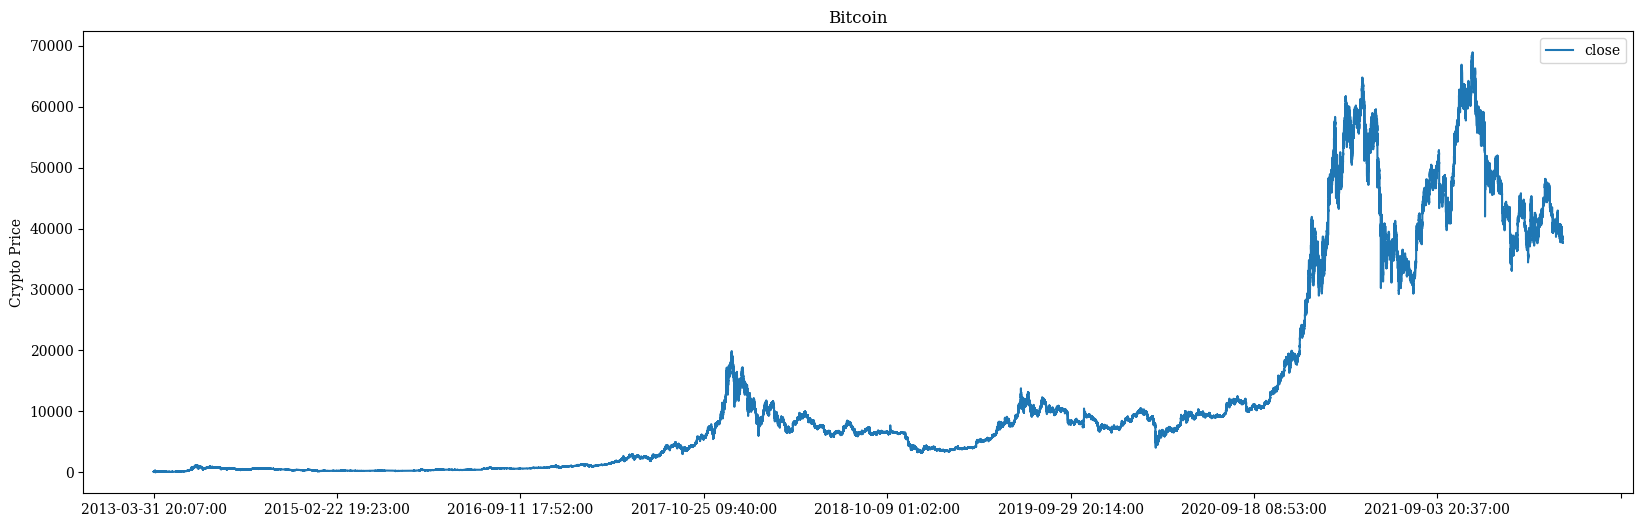

In [108]:
df_btc[['close']].plot(figsize=(20, 6))
plt.ylabel("Crypto Price")
plt.title("Bitcoin")
plt.show()

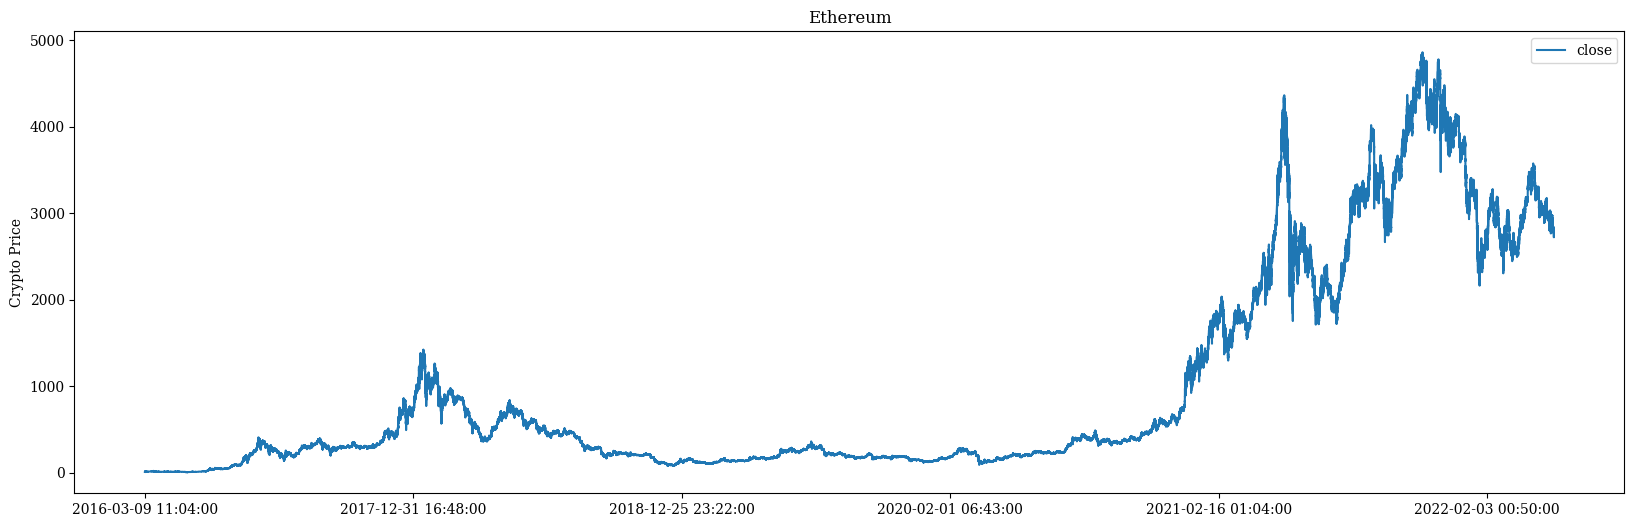

In [110]:
df_eth[['close']].plot(figsize=(20, 6))
plt.ylabel("Crypto Price")
plt.title("Ethereum")
plt.show()

### Clean & Transform Data

In [111]:
df_btc=df_btc.fillna(method='ffill')
scaler = MinMaxScaler(feature_range=(-1, 1))
df_btc['close'] = scaler.fit_transform(df_btc['close'].values.reshape(-1,1))

In [112]:
df_eth=df_btc.fillna(method='ffill')
scaler = MinMaxScaler(feature_range=(-1, 1))
df_eth['close'] = scaler.fit_transform(df_eth['close'].values.reshape(-1,1))